In [9]:
# Import helper functions

import os
import random
import shutil

directory = 'dataset'

def split_dir_to_train_test_val(directory = "dataset/",
                            train_size = 0.8,
                            test_size = 0.1,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)
      
      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:
      
        # Copy  files
        dest_dir = "dataset/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:      
        # Copy  files
        dest_dir = "dataset/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:
      
        # Copy  files
        dest_dir = "dataset/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")
      
     


def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names 
  return class_names
  print(class_names)

In [10]:
# # Split images dir to train, test and validation
# split_dir_to_train_test_val(directory="dataset/",
#                             train_size=0.8,
#                             test_size=0.1,
#                             val_size=0.1)

In [11]:
# Using helper function get class names
directory = 'dataset_2'
train = 'dataset_2/train'
test = 'dataset_2/test'
val = 'dataset_2/validation'

class_names = get_class_names_from_folder(directory)
class_names

array(['test', 'train', 'validation'], dtype='<U10')

In [12]:
len(class_names)

3

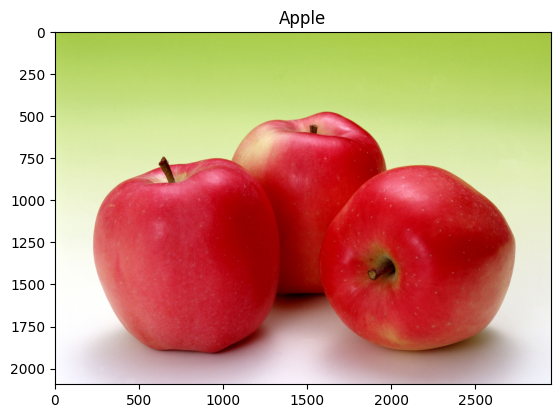

In [13]:
# Let's visualize some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("dataset_2/test/", "Apple")

In [14]:
# Import library
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="dataset_2/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="dataset_2/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="dataset_2/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 9865 images belonging to 30 classes.
Found 1235 images belonging to 30 classes.
Found 1249 images belonging to 30 classes.


In [20]:
# # Set random seed
# tf.random.set_seed(42)

import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, MaxPool2D
from tensorflow.keras.optimizers import Adam

# # Create model
# model = Sequential([
#     Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),
#     MaxPool2D(pool_size=2),
#     Conv2D(10, 3, activation="relu"),
#     MaxPool2D(pool_size=2),
#     Conv2D(10, 3, activation="relu"),
#     MaxPool2D(pool_size=2),
#     Conv2D(10, 3, activation="relu"),
#     MaxPool2D(pool_size=2),
#     Flatten(),
#     Dense(30, activation="softmax")
# ])

# # Compile the model
# model.compile(loss="categorical_crossentropy",
#               optimizer=Adam(),
#               metrics=["accuracy"])


cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = 3,  padding = 'same', activation = 'relu',
                     input_shape = (240, 240, 3)))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',  activation = 'relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=64, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=64, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=64, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(MaxPooling2D())
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Conv2D(filters = 128, kernel_size = 3,  padding = 'same',   activation = 'relu'))
cnn_model.add(Conv2D(filters=128, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Conv2D(filters=265, activation='relu', padding='same',kernel_size=3 ))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(30, activation = 'softmax'))

In [21]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 240, 240, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 120, 120, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 120, 120, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 60, 60, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)      

In [22]:
cnn_model.compile(
    optimizer='Adam', 
    loss ='categorical_crossentropy', 
    metrics=['accuracy'])

In [25]:
# Fit the model

import time
import scipy

start_time = time.time()


epochs = 20
history = cnn_model.fit(train_data,
                    batch_size=32,
                    epochs=epochs,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

C:\Users\nigmu\.conda\envs\py_310_env\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/20
152/309 [=============>................] - ETA: 39s - loss: 3.4008 - accuracy: 0.0312

C:\Users\nigmu\.conda\envs\py_310_env\lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


309/309 [==============================] - 101s 302ms/step - loss: 3.4006 - accuracy: 0.0320 - val_loss: 3.3988 - val_accuracy: 0.0360
Epoch 2/20
309/309 [==============================] - 89s 287ms/step - loss: 3.3990 - accuracy: 0.0307 - val_loss: 3.3976 - val_accuracy: 0.0360
Epoch 3/20
309/309 [==============================] - 88s 285ms/step - loss: 3.3984 - accuracy: 0.0358 - val_loss: 3.3976 - val_accuracy: 0.0376
Epoch 4/20
309/309 [==============================] - 87s 282ms/step - loss: 3.3982 - accuracy: 0.0352 - val_loss: 3.3974 - val_accuracy: 0.0376
Epoch 5/20
309/309 [==============================] - 88s 284ms/step - loss: 3.3982 - accuracy: 0.0357 - val_loss: 3.3973 - val_accuracy: 0.0376
Epoch 6/20
309/309 [==============================] - 88s 285ms/step - loss: 3.3981 - accuracy: 0.0351 - val_loss: 3.3973 - val_accuracy: 0.0376
Epoch 7/20
309/309 [==============================] - 87s 282ms/step - loss: 3.3981 - accuracy: 0.0354 - val_loss: 3.3973 - val_accuracy: 0.

In [28]:
end_time = time.time()

# Calculate the total training time
total_time = end_time - start_time

# Calculate the average time per epoch
avg_epoch_time = total_time / epochs

print("Total training time:", total_time, "seconds")
print("Average time per epoch:", avg_epoch_time, "seconds")

Total training time: 4403.864392757416 seconds
Average time per epoch: 220.19321963787078 seconds


In [30]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(240, 240, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(30, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history_2 = model.fit(train_data,
                      batch_size=32,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=validation_data,
                      validation_steps=len(validation_data),
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=2,
                                                                  restore_best_weights=True)])

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
309/309 [==============================] - 91s 286ms/step - loss: 0.8411 - accuracy: 0.7765 - val_loss: 0.4318 - val_accuracy: 0.8791
Epoch 2/10
309/309 [==============================] - 83s 267ms/step - loss: 0.2448 - accuracy: 0.9271 - val_loss: 0.3511 - val_accuracy: 0.8919
Epoch 3/10
309/309 [==============================] - 82s 264ms/step - loss: 0.1213 - accuracy: 0.9669 - val_loss: 0.3551 - val_accuracy: 0.9031
Epoch 4/10
309/309 [==============================] - 83s 268ms/step - loss: 0.0652 - accuracy: 0.9827 - val_loss: 0.3043 - val_accuracy: 0.9135
Epoch 5/10
309/309 [==============================] - 83s 267ms/step - loss: 0.0334 - accuracy: 0.9918 - val_loss: 0.3154 - val_accuracy: 0.9223
Epoch 6/10
309/309 [==============================] - 83s 268ms/step - loss: 0.0223 - accuracy: 0.9953 - val_loss: 0.3119 - val_accuracy: 0.9255


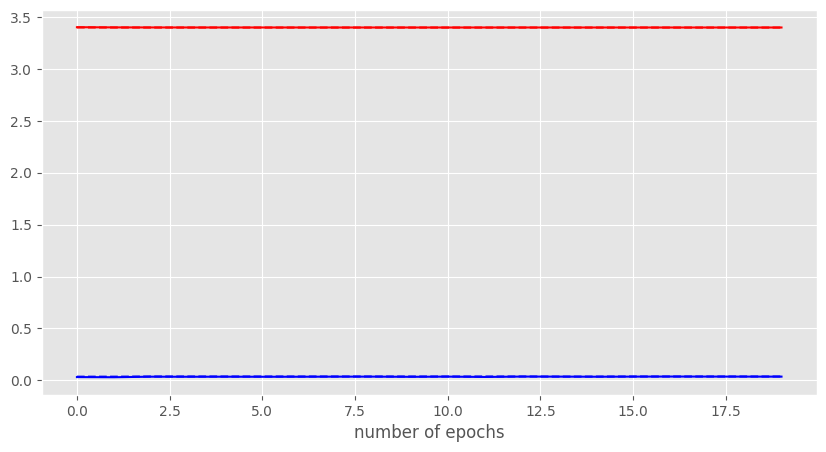

In [34]:
#plot history of loss and accuracy
hist = history.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

#loss history
plt.plot(hist['loss'], c = 'red', label = 'train loss')
plt.plot(hist['val_loss'], c = 'red', label = 'validation loss', linestyle = '--')

#accuracy history
plt.plot(hist['accuracy'], c = 'blue', label = 'train accuracy')
plt.plot(hist['val_accuracy'], c = 'blue', label = 'validation accuracy', linestyle = '--')


plt.xlabel("number of epochs")
plt.show()

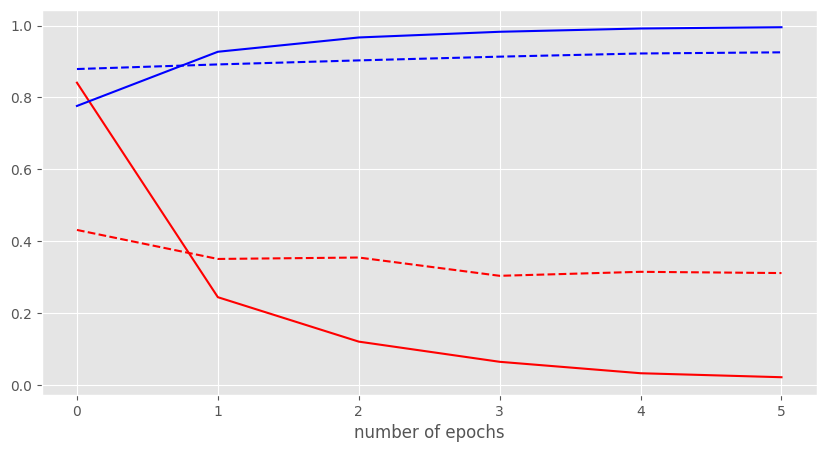

In [35]:
#plot history of loss and accuracy
hist = history_2.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

#loss history
plt.plot(hist['loss'], c = 'red', label = 'train loss')
plt.plot(hist['val_loss'], c = 'red', label = 'validation loss', linestyle = '--')

#accuracy history
plt.plot(hist['accuracy'], c = 'blue', label = 'train accuracy')
plt.plot(hist['val_accuracy'], c = 'blue', label = 'validation accuracy', linestyle = '--')


plt.xlabel("number of epochs")
plt.show()

In [43]:
cnn_model.evaluate(test_data)
cnn_model.evaluate(train_data)
cnn_model.evaluate(validation_data)

40/40 [==============================] - 9s 217ms/step - loss: 3.3973 - accuracy: 0.0376


[3.397266149520874, 0.0376301035284996]

In [45]:
model.evaluate(test_data)
model.evaluate(train_data)
model.evaluate(validation_data)

40/40 [==============================] - 9s 225ms/step - loss: 0.3043 - accuracy: 0.9135


[0.3042523264884949, 0.9135308265686035]

In [46]:
labels = {value: key for key, value in train_data.class_indices.items()}

print("Label Mappings for classes \n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes 

0 : Apple
1 : Banana
2 : Broccoli
3 : Carrots
4 : Cauliflower
5 : Chili
6 : Coconut
7 : Cucumber
8 : Custard apple
9 : Dates
10 : Dragon
11 : Egg
12 : Garlic
13 : Grape
14 : Green Lemon
15 : Jackfruit
16 : Kiwi
17 : Mango
18 : Okra
19 : Onion
20 : Orange
21 : Papaya
22 : Peanut
23 : Pineapple
24 : Pomegranate
25 : Star Fruit
26 : Strawberry
27 : Sweet Potato
28 : Watermelon
29 : White Mushroom


In [47]:
ModelLoss, ModelAccuracy = cnn_model.evaluate(test_data)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

39/39 [==============================] - 12s 297ms/step - loss: 3.3975 - accuracy: 0.0372
Test Loss is 3.397489070892334
Test Accuracy is 0.03724696487188339


In [48]:
ModelLoss, ModelAccuracy = model.evaluate(test_data)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

39/39 [==============================] - 11s 276ms/step - loss: 0.2521 - accuracy: 0.9344
Test Loss is 0.2520603835582733
Test Accuracy is 0.934412956237793


In [98]:
class_map = dict([v,k] for k,v in train_data.class_indices.items())
print(class_map)

{0: 'Apple', 1: 'Banana', 2: 'Broccoli', 3: 'Carrots', 4: 'Cauliflower', 5: 'Chili', 6: 'Coconut', 7: 'Cucumber', 8: 'Custard apple', 9: 'Dates', 10: 'Dragon', 11: 'Egg', 12: 'Garlic', 13: 'Grape', 14: 'Green Lemon', 15: 'Jackfruit', 16: 'Kiwi', 17: 'Mango', 18: 'Okra', 19: 'Onion', 20: 'Orange', 21: 'Papaya', 22: 'Peanut', 23: 'Pineapple', 24: 'Pomegranate', 25: 'Star Fruit', 26: 'Strawberry', 27: 'Sweet Potato', 28: 'Watermelon', 29: 'White Mushroom'}


1/1 [==============================] - 0s 20ms/step


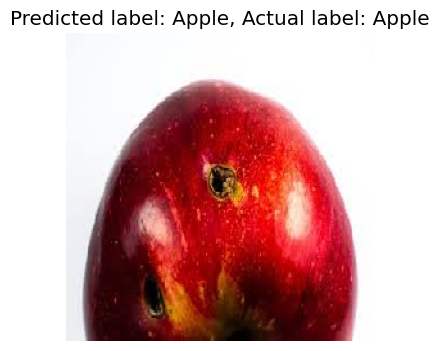

In [108]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image_path = "139.jpeg"

def predictions(test_image_path, actual_label):

    # Load and preprocess image
    test_img = image.load_img(test_image_path, target_size=(240, 240))
    test_img_arr = image.img_to_array(test_img) / 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # Prediction
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_img = class_map[predicted_label]

    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted label: {}, Actual label: {}".format(predicted_img, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()


predictions(test_image_path, actual_label ="Apple")

In [110]:
def predict_label(test_image_path):

    # Load and preprocess image
    test_img = image.load_img(test_image_path, target_size=(240, 240))
    test_img_arr = image.img_to_array(test_img) / 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # Prediction
    predicted_label = np.argmax(model.predict(test_img_input))
    
    return [predicted_label]

predicted_label = predict_label("139.jpeg")
print(predicted_label)

1/1 [==============================] - 0s 21ms/step
[0]


In [103]:
# THIS IS FOR TESTING ONLY, UNCOMMENT IF WANT TO CHECK






# import os
# import numpy as np
# from tensorflow.keras.preprocessing import image

# test_folder = "dataset_2/test"
# class_map = {0: 'Apple', 1: 'Banana', 2: 'Broccoli', 3: 'Carrots', 4: 'Cauliflower', 5: 'Chili', 6: 'Coconut', 7: 'Cucumber', 8: 'Custard apple', 9: 'Dates', 10: 'Dragon', 11: 'Egg', 12: 'Garlic', 13: 'Grape', 14: 'Green Lemon', 15: 'Jackfruit', 16: 'Kiwi', 17: 'Mango', 18: 'Okra', 19: 'Onion', 20: 'Orange', 21: 'Papaya', 22: 'Peanut', 23: 'Pineapple', 24: 'Pomegranate', 25: 'Star Fruit', 26: 'Strawberry', 27: 'Sweet Potato', 28: 'Watermelon', 29: 'White Mushroom'}# Update this with your class mapping

# def predictions(test_folder):
#     for subdir, dirs, files in os.walk(test_folder):
#         for file in files:
#             if file.endswith(".jpeg"):
#                 test_image_path = os.path.join(subdir, file)
#                 actual_label = os.path.basename(subdir)
                
#                 # Load and preprocess image
#                 test_img = image.load_img(test_image_path, target_size=(240, 240))
#                 test_img_arr = image.img_to_array(test_img) / 255.0
#                 test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

#                 # Prediction
#                 predicted_label = np.argmax(model.predict(test_img_input))
#                 predicted_img = class_map[predicted_label]

#                 plt.figure(figsize=(1, 1))
#                 plt.imshow(test_img_arr)
#                 plt.title("Predicted label: {}, Actual label: {}".format(predicted_img, actual_label))
#                 plt.grid()
#                 plt.axis('off')
#                 plt.show()

# predictions(test_folder)


In [104]:
# # Save the entire model as a `.keras` zip archive.
# model.save('model_2.0.keras')

In [107]:
# new_model = tf.keras.models.load_model('model_2.0.keras')

# # Show the model architecture
# new_model.summary()

In [106]:
# # from tensorflow.keras.models import load_model

# # Load the saved model
# loaded_model = tf.keras.models.load_model('model_2.0.keras')

# # Now you can use the loaded model to make predictions on new data
# # For example, if you have a test image:
# test_image_path = "139.jpeg"
# test_image = load_and_resize_image(test_image_path, 240)

# # Preprocess the image if necessary

# # Make predictions
# predictions = loaded_model.predict(test_image)

# # Print the predictions
# print(predictions)
